<a href="https://colab.research.google.com/github/prof-eduardo-galego/fiap-bpm-ia/blob/main/modulo_V_aprendizagem_profunda_autokeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo V: Aprendizagem Profunda - AutoKeras

Este notebook vamos conhecer a biblioteca __AutoKeras__, conhecida como um AutoML para outra bibliteca conhecida de Aprendizagem Profunda, o __Keras__.

Este exemplo foi extraído de https://autokeras.com/tutorial/structured_data_regression/.

## Biblioteca e Módulos

Vamos utilizar a bilioteca __AutoKeras__ neste exemplo. 

Ele não vem instalado por padrão no Colab, por isso vamos precisa fazer a instalação dele utilizando o comando abaixo.

> __Dica:__ Todos os comandos iniciados com `!` no notebook são comando executados pelo sistema operacional, e não pelo Python. 




In [1]:
!pip install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 7.9 MB/s 
     |████████████████████████████████| 135 kB 32.7 MB/s 
     |████████████████████████████████| 1.6 MB 54.8 MB/s 


Segue então a importação das bibliotecas no nosso código em Python:

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from keras.utils.vis_utils import plot_model

import autokeras as ak

## Dados

Neste exemplo, vamos utilizar uma base de dados de casas localizados na California EUA e seus respectivos valores de venda e criar um modelo regressivo para prever o valor de venda.

Logo em seguida, separamos os dados de treino e teste.

Segue o código:

In [3]:
house_dataset = fetch_california_housing()
df = pd.DataFrame(
    np.concatenate(
        (house_dataset.data, house_dataset.target.reshape(-1, 1)), axis=1
    ),
    columns=house_dataset.feature_names + ["Price"],
)

train_file_path = "train.csv"
test_file_path = "eval.csv"

train_size = int(df.shape[0] * 0.8)

df[:train_size].to_csv(train_file_path, index=False)
df[train_size:].to_csv(test_file_path, index=False)

## Construção do Modelo

O código a seguir mostra a criação de três modelos diferentes (`max_trials=3`). Para cada modelo, serão realizados 10 epochs, ou seja, 10 atualizações nos valores de bias buscando diminuir o erro médio.



In [10]:
reg = ak.StructuredDataRegressor(
    overwrite=True, max_trials=10
)

reg.fit(
    train_file_path,
    "Price",
    epochs=10,
)

Trial 10 Complete [00h 00m 17s]
val_loss: 0.7956409454345703

Best val_loss So Far: 0.7956409454345703
Total elapsed time: 00h 02m 50s
Epoch 1/10
516/516 [==============================] - 2s 2ms/step - loss: 3.6908 - mean_squared_error: 3.6908
Epoch 2/10
516/516 [==============================] - 1s 2ms/step - loss: 1.7302 - mean_squared_error: 1.7302
Epoch 3/10
516/516 [==============================] - 1s 2ms/step - loss: 1.1106 - mean_squared_error: 1.1106
Epoch 4/10
516/516 [==============================] - 1s 2ms/step - loss: 0.8995 - mean_squared_error: 0.8995
Epoch 5/10
516/516 [==============================] - 1s 2ms/step - loss: 0.8131 - mean_squared_error: 0.8131
Epoch 6/10
516/516 [==============================] - 1s 2ms/step - loss: 0.7627 - mean_squared_error: 0.7627
Epoch 7/10
516/516 [==============================] - 1s 2ms/step - loss: 0.7254 - mean_squared_error: 0.7254
Epoch 8/10
516/516 [==============================] - 1s 2ms/step - loss: 0.6956 - mean_squared

É possível exibir e exportar o modelo mais performático e carregá-lo em outro software. Segue:

In [7]:
model = reg.export_model()

model.summary()

try:
  model.save("model_autokeras", save_format="tf")
except Exception: 
  model.save("model_autokeras.h5")

# Utilize a seguinte linha para carregar um modelo:
#loaded_model = load_model("model_autokeras", custom_objects=ak.CUSTOM_OBJECTS)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 multi_category_encoding (Mu  (None, 8)                0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 8)                17        
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                288       
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056  

Também é possível exibir o modelo criado:

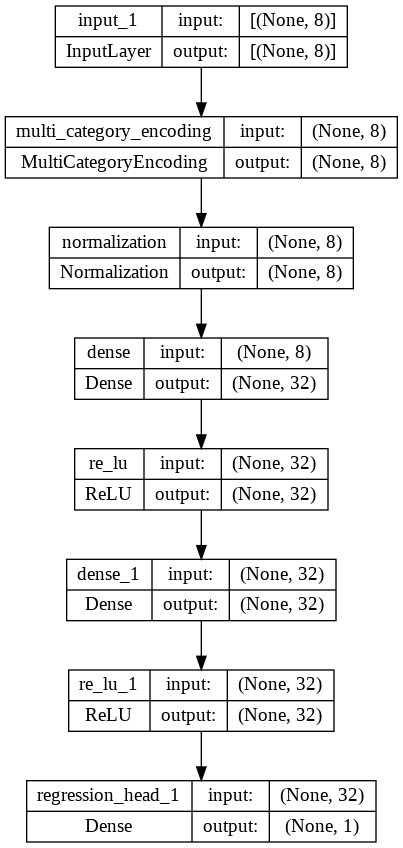

In [8]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Avaliação

Utilize o objeto `reg` criado nos códigos anteriores para obter o melhor modelo e validar com o conjunto de dados de teste. Segue o código:

In [9]:
# Predict with the best model.
predicted_y = reg.predict(test_file_path)
# Evaluate the best model with testing data.
print(reg.evaluate(test_file_path, "Price"))

129/129 [==============================] - 0s 2ms/step - loss: 0.8764 - mean_squared_error: 0.8764
[0.8764241337776184, 0.8764241337776184]
